In [37]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib as mpl

In [2]:
#Karpathy 1. fix random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

In [3]:
ATT_FILE_NAME = "FootballPlayerPreparedCleanAttributesCompleto.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "FootballPlayerOneHotEncodedClassesCompleto.csv"

In [38]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
att = pd.read_csv(ATT_FILE_NAME)
target = pd.read_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
att.describe()

,Age,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,...,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,-0.279578,0.000665,-0.975720,-0.964141,-0.008453,-0.942253,0.002295,-0.644999,0.053537,-0.064418,...,-0.025506,0.136145,-0.013976,0.043417,0.060219,0.003275,0.036497,-0.016356,0.010054,-0.021365
std,0.363768,0.258486,0.069463,0.079938,0.291911,0.198271,0.318458,0.411882,0.344606,0.385352,...,0.379027,0.352347,0.458493,0.349409,0.314939,0.312770,0.274291,0.409949,0.461961,0.473324
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.600000,-0.191489,-0.999409,-0.996460,-0.218425,-1.000000,0.000000,-1.000000,-0.195122,-0.388235,...,-0.301205,-0.097561,-0.414634,-0.166667,-0.146341,-0.250000,-0.162162,-0.357143,-0.397590,-0.456790
50%,-0.280000,-0.021277,-0.998776,-0.989381,-0.004458,-1.000000,0.000000,-1.000000,0.097561,-0.011765,...,0.036145,0.170732,0.121951,0.095238,0.097561,0.000000,0.054054,0.095238,0.180723,0.135802
75%,-0.040000,0.148936,-0.978059,-0.968142,0.197251,-1.000000,0.000000,-0.333333,0.317073,0.247059,...,0.277108,0.390244,0.341463,0.285714,0.292683,0.250000,0.243243,0.309524,0.373494,0.358025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
"""ATT_FILE_NAMEatt = att.drop (columns="Potential")
att.head()"""

,Age,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,-0.68,0.046062,-1.0,0.0,-1.000000,-0.958763,-0.121951,-0.411765,0.063291,0.287671,...,0.060241,0.195122,0.243902,-0.166667,0.121951,-0.200,0.243243,0.428571,0.349398,0.358025
1,-0.36,-0.023774,-1.0,0.0,-1.000000,-0.628866,0.121951,-0.105882,-0.113924,0.013699,...,-0.060241,0.000000,0.365854,-0.119048,-0.292683,0.175,-0.351351,0.095238,0.180723,0.259259
2,-0.44,-0.368499,-1.0,0.0,-1.000000,-0.628866,-0.146341,0.200000,-0.493671,-0.315068,...,0.012048,-0.560976,-0.682927,-0.047619,-0.195122,-0.050,-0.270270,-0.166667,-0.590361,-0.654321
3,-0.52,0.029718,-1.0,0.5,-0.333333,-0.628866,0.170732,0.152941,-0.468354,0.424658,...,0.349398,-0.317073,-0.707317,0.214286,0.463415,0.075,0.270270,-0.285714,-0.349398,-0.185185
4,-0.68,0.049034,-1.0,0.0,-0.333333,-0.505155,-0.146341,0.082353,-0.012658,0.150685,...,0.060241,0.219512,0.195122,0.023810,0.048780,-0.050,-0.459459,0.142857,0.228916,0.135802


In [7]:
X_train,X_rem,y_train,y_rem = train_test_split(att,target,train_size=0.8)
X_valid,X_test,y_valid,y_test = train_test_split(X_rem,y_rem,train_size=0.5)

In [8]:
X_train.shape

(12897, 37)

In [45]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
]



In [43]:
def plot_metrics(history):
  metrics = ['loss',  'precision', 'recall','accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [52]:
model = model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(12, activation='relu'),
  
  



    keras.layers.Dense(4, activation='softmax')
])

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=METRICS)

In [27]:
BATCH_SIZE = 256
EPOCHS = 100

In [54]:
h = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_test,y_test),batch_size=BATCH_SIZE)

Epoch 1/100
51/51 [==============================] - 1s 6ms/step - loss: 1.2863 - tp: 1821.0000 - fp: 220.0000 - tn: 43310.0000 - fn: 12689.0000 - accuracy: 0.4373 - precision: 0.8922 - recall: 0.1255 - val_loss: 1.2187 - val_tp: 141.0000 - val_fp: 26.0000 - val_tn: 4813.0000 - val_fn: 1472.0000 - val_accuracy: 0.4104 - val_precision: 0.8443 - val_recall: 0.0874
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 1.1279 - tp: 1921.0000 - fp: 476.0000 - tn: 38215.0000 - fn: 10976.0000 - accuracy: 0.4732 - precision: 0.8014 - recall: 0.1489 - val_loss: 1.0572 - val_tp: 345.0000 - val_fp: 83.0000 - val_tn: 4756.0000 - val_fn: 1268.0000 - val_accuracy: 0.5183 - val_precision: 0.8061 - val_recall: 0.2139
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 0.9801 - tp: 3693.0000 - fp: 794.0000 - tn: 37897.0000 - fn: 9204.0000 - accuracy: 0.5670 - precision: 0.8230 - recall: 0.2863 - val_loss: 0.9301 - val_tp: 484.0000 - val_fp: 100.0000 - val_tn: 473

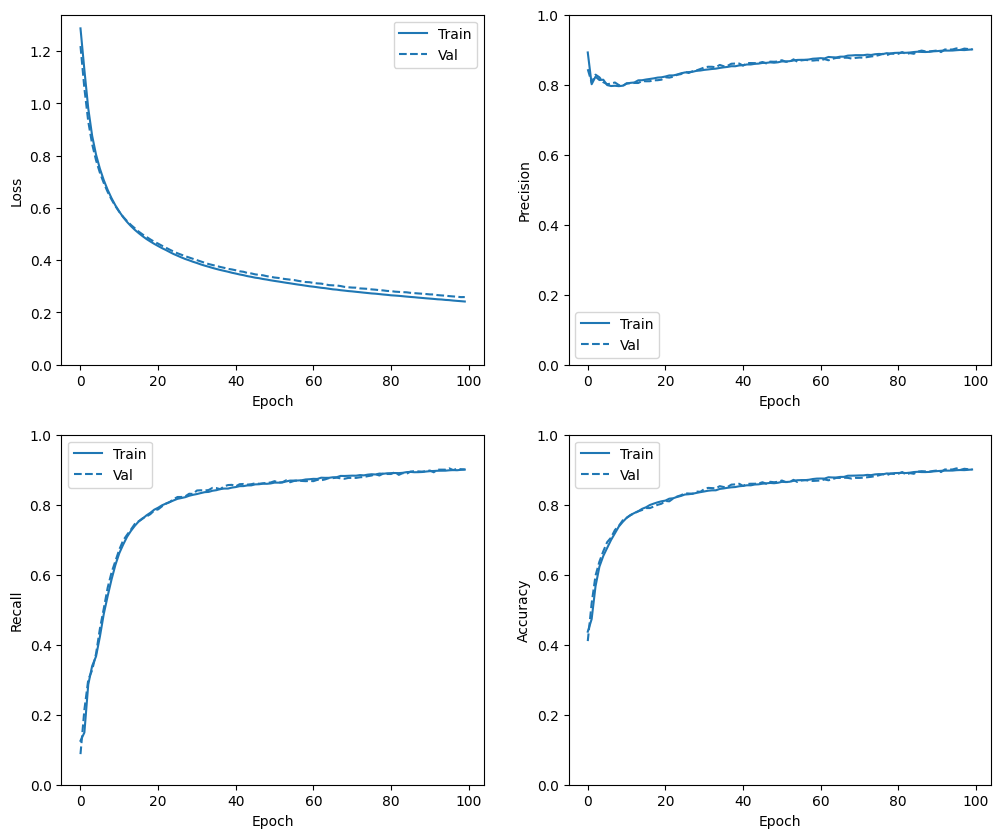

In [55]:
plot_metrics(h)

In [57]:
y_pred = model.predict(X_test)

51/51 [==============================] - 0s 600us/step


7/7 [==============================] - 0s 2ms/step - loss: 0.2588 - tp: 1453.0000 - fp: 159.0000 - tn: 4680.0000 - fn: 160.0000 - accuracy: 0.9008 - precision: 0.9014 - recall: 0.9008
loss :  0.25882723927497864
tp :  1453.0
fp :  159.0
tn :  4680.0
fn :  160.0
accuracy :  0.9008059501647949
precision :  0.9013647437095642
recall :  0.9008059501647949



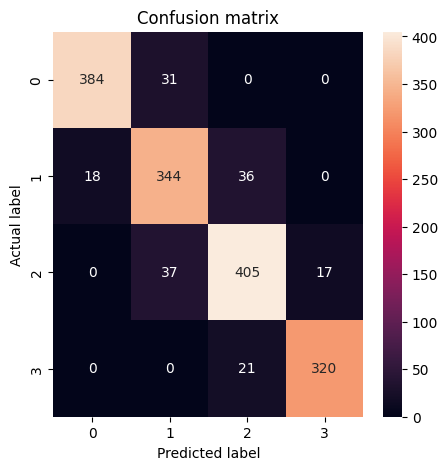

In [58]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels,predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=1)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(np.argmax(y_test.to_numpy(),axis=1), y_pred.argmax(axis=1))


In [30]:
def evaluate_model(model,h=None,nombre=f'default' ):
    
    import matplotlib.pyplot as plt
    if h is not None:
        history = h
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'model {nombre} accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'model {nombre} loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
    y_pred = model.predict(X_test).argmax(axis=1)
    np.argmax(np.asarray(y_test),axis=1)
    print(classification_report(np.argmax(np.asarray(y_test),axis=1),y_pred))



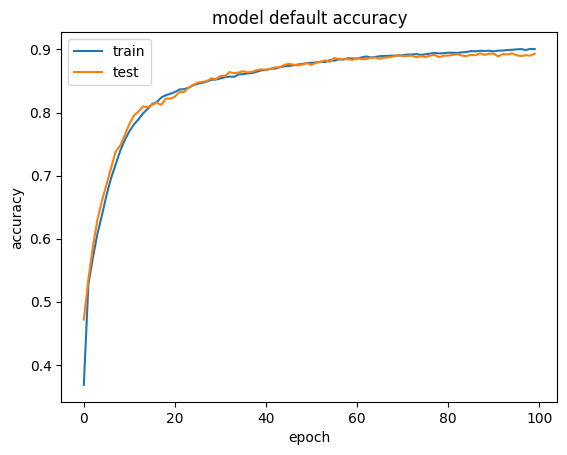

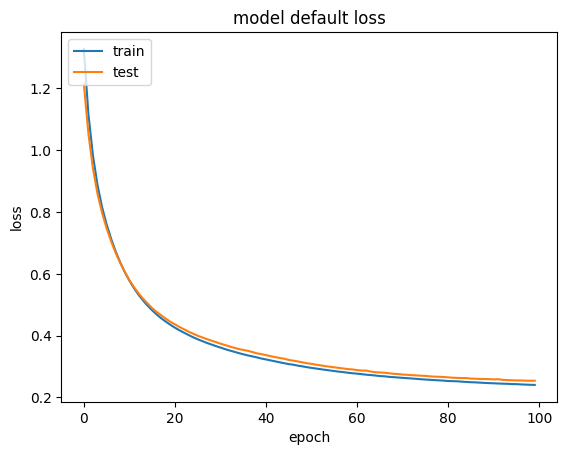

51/51 [==============================] - 0s 590us/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       415
           1       0.83      0.85      0.84       398
           2       0.88      0.87      0.87       459
           3       0.94      0.93      0.94       341

    accuracy                           0.89      1613
   macro avg       0.90      0.90      0.90      1613
weighted avg       0.89      0.89      0.89      1613



In [33]:
evaluate_model(model,h)

In [97]:
model1 =keras.Sequential([
    keras.layers.Flatten(input_shape=(36,)),
    keras.layers.Dense(256, activation='elu'),
    keras.layers.Dense(256, activation='elu'),


    keras.layers.Dense(4, activation='softmax')
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(36,)),
    keras.layers.Dense(128, activation='elu'),
    keras.layers.Dense(128, activation='elu'),


    keras.layers.Dense(4, activation='softmax')
])
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h1 = model1.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))
h2 = model2.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))


models = [model1,model2]
model_input = tf.keras.Input(shape=(36,))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input,outputs=ensemble_output)


Epoch 1/30
404/404 [==============================] - 1s 2ms/step - loss: 0.5558 - accuracy: 0.7451 - val_loss: 0.4444 - val_accuracy: 0.8153
Epoch 2/30
404/404 [==============================] - 1s 1ms/step - loss: 0.4212 - accuracy: 0.8141 - val_loss: 0.3813 - val_accuracy: 0.8357
Epoch 3/30
404/404 [==============================] - 1s 1ms/step - loss: 0.3655 - accuracy: 0.8408 - val_loss: 0.3751 - val_accuracy: 0.8351
Epoch 4/30
404/404 [==============================] - 1s 1ms/step - loss: 0.3333 - accuracy: 0.8566 - val_loss: 0.3110 - val_accuracy: 0.8624
Epoch 5/30
404/404 [==============================] - 1s 1ms/step - loss: 0.2789 - accuracy: 0.8777 - val_loss: 0.2619 - val_accuracy: 0.8779
Epoch 6/30
404/404 [==============================] - 1s 1ms/step - loss: 0.2428 - accuracy: 0.8958 - val_loss: 0.2415 - val_accuracy: 0.9002
Epoch 7/30
404/404 [==============================] - 1s 1ms/step - loss: 0.2295 - accuracy: 0.9007 - val_loss: 0.2224 - val_accuracy: 0.9051
Epoch 

In [98]:
evaluate_model(ensemble_model)

51/51 [==============================] - 0s 760us/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       442
           1       0.90      0.88      0.89       363
           2       0.94      0.93      0.93       462
           3       0.95      0.97      0.96       346

    accuracy                           0.93      1613
   macro avg       0.93      0.93      0.93      1613
weighted avg       0.93      0.93      0.93      1613



In [55]:
model1 =keras.Sequential([
    keras.layers.Flatten(input_shape=(24,)),
    keras.layers.Dense(256, activation='elu'),
    keras.layers.Dense(256, activation='elu'),


    keras.layers.Dense(4, activation='softmax')
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(24,)),
    keras.layers.Dense(128, activation='elu'),
    keras.layers.Dense(128, activation='elu'),


    keras.layers.Dense(4, activation='softmax')
])
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(24,)),
    keras.layers.Dense(128, activation='elu'),
    keras.layers.Dense(128, activation='elu'),


    keras.layers.Dense(4, activation='softmax')
])
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(24,)),
    keras.layers.Dense(256, activation='elu'),
    keras.layers.Dense(156, activation='elu'),


    keras.layers.Dense(4, activation='softmax')
])
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h1 = model1.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))
h2 = model2.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))
h3 = model3.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))
h4 = model4.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))



models = [model1,model2,model3,model4]
model_input = tf.keras.Input(shape=(24,))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input,outputs=ensemble_output)


Epoch 1/30
404/404 [==============================] - 1s 2ms/step - loss: 0.5632 - accuracy: 0.7461 - val_loss: 0.5158 - val_accuracy: 0.7700
Epoch 2/30
404/404 [==============================] - 1s 1ms/step - loss: 0.4756 - accuracy: 0.7879 - val_loss: 0.5033 - val_accuracy: 0.7824
Epoch 3/30
404/404 [==============================] - 1s 1ms/step - loss: 0.4277 - accuracy: 0.8127 - val_loss: 0.4115 - val_accuracy: 0.8283
Epoch 4/30
404/404 [==============================] - 1s 1ms/step - loss: 0.3844 - accuracy: 0.8265 - val_loss: 0.3345 - val_accuracy: 0.8586
Epoch 5/30
404/404 [==============================] - 1s 1ms/step - loss: 0.3190 - accuracy: 0.8627 - val_loss: 0.3342 - val_accuracy: 0.8531
Epoch 6/30
404/404 [==============================] - 1s 1ms/step - loss: 0.2901 - accuracy: 0.8751 - val_loss: 0.3352 - val_accuracy: 0.8580
Epoch 7/30
404/404 [==============================] - 1s 1ms/step - loss: 0.2873 - accuracy: 0.8747 - val_loss: 0.2793 - val_accuracy: 0.8828
Epoch 

Hipotesis : conseguir 2 modelos (o más, depende) candidatos decentes que nos permitan hacer un mejor ensemble.

In [90]:
model1 =keras.Sequential([
    keras.layers.Flatten(input_shape=(24,)),
    keras.layers.Dense(256, activation='elu'),
    keras.layers.Dense(256, activation='elu'),


    keras.layers.Dense(4, activation='softmax')
])
model1.compile(optimizer=tf.keras.optimizers.Nadam(3e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
h1 = model1.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))


Epoch 1/30
404/404 [==============================] - 1s 2ms/step - loss: 0.6672 - accuracy: 0.7081 - val_loss: 0.5556 - val_accuracy: 0.7533
Epoch 2/30
404/404 [==============================] - 1s 1ms/step - loss: 0.4954 - accuracy: 0.7793 - val_loss: 0.5236 - val_accuracy: 0.7588
Epoch 3/30
404/404 [==============================] - 1s 1ms/step - loss: 0.4766 - accuracy: 0.7896 - val_loss: 0.5095 - val_accuracy: 0.7725
Epoch 4/30
404/404 [==============================] - 1s 1ms/step - loss: 0.4610 - accuracy: 0.7969 - val_loss: 0.4779 - val_accuracy: 0.7998
Epoch 5/30
404/404 [==============================] - 1s 1ms/step - loss: 0.4448 - accuracy: 0.8040 - val_loss: 0.4549 - val_accuracy: 0.7998
Epoch 6/30
404/404 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8103 - val_loss: 0.4383 - val_accuracy: 0.8103
Epoch 7/30
404/404 [==============================] - 1s 2ms/step - loss: 0.4119 - accuracy: 0.8186 - val_loss: 0.4242 - val_accuracy: 0.8134
Epoch 

In [59]:
y_valid[:10]

,"Poor:[46.0, 62.0]","Interm:[63.0, 66.0]","Good:[67.0, 71.0]","Excel:[72.0, 94.0]"
15427,1.0,0.0,0.0,0.0
197,0.0,0.0,0.0,1.0
12798,0.0,1.0,0.0,0.0
3451,0.0,0.0,0.0,1.0
13680,1.0,0.0,0.0,0.0
16348,1.0,0.0,0.0,0.0
9159,0.0,1.0,0.0,0.0
14981,1.0,0.0,0.0,0.0
8271,0.0,0.0,1.0,0.0
15663,1.0,0.0,0.0,0.0


In [5]:
import numpy as np

In [6]:
cadenas = []
cadenas_target = []
for x,y in zip(att.to_numpy(),target.to_numpy()):
    temp = ['A football player with']
    for i in range(0,len(x)):
        temp.append(f' {att.columns[i]} of '+str(x[i])+',')
    cadenas.append((''.join(temp)[:-1]))
    cadenas_target.append(np.argmax(y,axis=0))
cadenas

['A football player with Age of 0.0344827586206895, Special of 0.8216718266253871, International Reputation of 1.0, Weak Foot of 0.5, Skill Moves of 0.5, Jersey Number of -0.8163265306122449, Crossing of 0.7954545454545454, Finishing of 1.0, HeadingAccuracy of 0.4666666666666668, ShortPassing of 0.930232558139535, Volleys of 0.9069767441860466, Dribbling of 1.0000000000000004, Curve of 0.9772727272727276, FKAccuracy of 1.0000000000000002, LongPassing of 0.857142857142857, BallControl of 1.0, Acceleration of 0.8588235294117648, SprintSpeed of 0.7619047619047619, Agility of 0.878048780487805, Reactions of 0.9733333333333336, Balance of 0.975, ShotPower of 0.78494623655914, Jumping of 0.3250000000000002, Stamina of 0.4285714285714286, Strength of 0.05, LongShots of 1.0000000000000002, Aggression of -0.119047619047619, Interceptions of -0.5730337078651685, Positioning of 0.978494623655914, Vision of 1.0, Penalties of 0.6091954022988504, Composure of 1.0, Marking of -0.3406593406593405, Sta

In [7]:
df = pd.DataFrame(data=np.reshape(cadenas,(-1,1)),columns=['text'])

In [8]:
df['label'] = np.reshape(cadenas_target,(-1,1))

In [9]:
from datasets import Dataset
ds = Dataset.from_pandas(df)
ds = ds.with_format('torch')
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

c:\Users\xhiib\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True)

In [11]:
ds = ds.map(preprocess_function, batched=True)

100%|██████████| 19/19 [00:05<00:00,  3.30ba/s]


In [15]:
ds = ds.train_test_split(0.3)

In [12]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [13]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=4)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier

In [14]:
from datasets import load_metric
metric = load_metric('accuracy')

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

C:\Users\xhiib\AppData\Local\Temp\ipykernel_22828\736967938.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('accuracy')


In [16]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy='epoch'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds['train'],
    eval_dataset=ds["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
c:\Users\xhiib\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 12702
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3970
  Number of trainable parameters = 66956548
 13%|█▎        | 500/3970 [02:10<13:19,  4.34it/s] Saving model checkpoint to ./results\checkp

{'loss': 0.9852, 'learning_rate': 1.7481108312342572e-05, 'epoch': 0.63}


Model weights saved in ./results\checkpoint-500\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-500\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-500\special_tokens_map.json
 20%|██        | 794/3970 [03:19<12:07,  4.37it/s]The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5445
  Batch size = 16

 20%|██        | 794/3970 [03:45<12:07,  4.37it/s]

{'eval_loss': 0.5342837572097778, 'eval_accuracy': 0.7707988980716254, 'eval_runtime': 26.2875, 'eval_samples_per_second': 207.133, 'eval_steps_per_second': 12.972, 'epoch': 1.0}


 25%|██▌       | 1000/3970 [04:33<11:24,  4.34it/s] Saving model checkpoint to ./results\checkpoint-1000
Configuration saved in ./results\checkpoint-1000\config.json


{'loss': 0.5835, 'learning_rate': 1.496221662468514e-05, 'epoch': 1.26}


Model weights saved in ./results\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-1000\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-1000\special_tokens_map.json
 38%|███▊      | 1500/3970 [06:29<09:27,  4.35it/s]Saving model checkpoint to ./results\checkpoint-1500
Configuration saved in ./results\checkpoint-1500\config.json


{'loss': 0.5037, 'learning_rate': 1.244332493702771e-05, 'epoch': 1.89}


Model weights saved in ./results\checkpoint-1500\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-1500\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-1500\special_tokens_map.json
 40%|████      | 1588/3970 [06:50<08:48,  4.51it/s]The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5445
  Batch size = 16
                                                   
 40%|████      | 1588/3970 [07:17<08:48,  4.51it/s]

{'eval_loss': 0.6447928547859192, 'eval_accuracy': 0.7351698806244261, 'eval_runtime': 26.063, 'eval_samples_per_second': 208.917, 'eval_steps_per_second': 13.084, 'epoch': 2.0}


 50%|█████     | 2000/3970 [08:53<07:31,  4.36it/s]  Saving model checkpoint to ./results\checkpoint-2000
Configuration saved in ./results\checkpoint-2000\config.json


{'loss': 0.4392, 'learning_rate': 9.924433249370277e-06, 'epoch': 2.52}


Model weights saved in ./results\checkpoint-2000\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-2000\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-2000\special_tokens_map.json
 60%|██████    | 2382/3970 [10:22<05:49,  4.54it/s]The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5445
  Batch size = 16
                                                   
 60%|██████    | 2382/3970 [10:48<05:49,  4.54it/s]

{'eval_loss': 0.42022812366485596, 'eval_accuracy': 0.8185491276400367, 'eval_runtime': 25.9355, 'eval_samples_per_second': 209.944, 'eval_steps_per_second': 13.148, 'epoch': 3.0}


 63%|██████▎   | 2500/3970 [11:15<05:38,  4.35it/s]  Saving model checkpoint to ./results\checkpoint-2500
Configuration saved in ./results\checkpoint-2500\config.json


{'loss': 0.4261, 'learning_rate': 7.405541561712847e-06, 'epoch': 3.15}


Model weights saved in ./results\checkpoint-2500\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-2500\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-2500\special_tokens_map.json
 76%|███████▌  | 3000/3970 [13:11<03:42,  4.36it/s]Saving model checkpoint to ./results\checkpoint-3000
Configuration saved in ./results\checkpoint-3000\config.json


{'loss': 0.3773, 'learning_rate': 4.886649874055416e-06, 'epoch': 3.78}


Model weights saved in ./results\checkpoint-3000\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-3000\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-3000\special_tokens_map.json
 80%|████████  | 3176/3970 [13:54<02:56,  4.50it/s]The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5445
  Batch size = 16
                                                   
 80%|████████  | 3176/3970 [14:20<02:56,  4.50it/s]

{'eval_loss': 0.47513943910598755, 'eval_accuracy': 0.806060606060606, 'eval_runtime': 26.0175, 'eval_samples_per_second': 209.282, 'eval_steps_per_second': 13.107, 'epoch': 4.0}


 88%|████████▊ | 3500/3970 [15:34<01:48,  4.35it/s]  Saving model checkpoint to ./results\checkpoint-3500
Configuration saved in ./results\checkpoint-3500\config.json


{'loss': 0.3558, 'learning_rate': 2.367758186397985e-06, 'epoch': 4.41}


Model weights saved in ./results\checkpoint-3500\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-3500\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-3500\special_tokens_map.json
100%|██████████| 3970/3970 [17:24<00:00,  4.50it/s]The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5445
  Batch size = 16
                                                   
100%|██████████| 3970/3970 [17:50<00:00,  4.50it/s]

Training completed. Do not forget to share your model on huggingface.co/models =)


100%|██████████| 3970/3970 [17:50<00:00,  3.71it/s]

{'eval_loss': 0.44901150465011597, 'eval_accuracy': 0.811386593204775, 'eval_runtime': 26.0425, 'eval_samples_per_second': 209.081, 'eval_steps_per_second': 13.094, 'epoch': 5.0}
{'train_runtime': 1070.8852, 'train_samples_per_second': 59.306, 'train_steps_per_second': 3.707, 'train_loss': 0.5021074271021922, 'epoch': 5.0}


TrainOutput(global_step=3970, training_loss=0.5021074271021922, metrics={'train_runtime': 1070.8852, 'train_samples_per_second': 59.306, 'train_steps_per_second': 3.707, 'train_loss': 0.5021074271021922, 'epoch': 5.0})